### Domain & Dataset:

Scenario 2: Market research for new store locations

A liquor store owner in Iowa is looking to expand to new locations and has hired you to investigate the market data for potential new locations. The business owner is interested in the details of the best model you can fit to the data so that his team can evaluate potential locations for a new storefront.

We are examining a dataset from the state of Iowa that contains data for liquor sales for a time period of 2015 and part of 2016. It contains the following features:

- Date 
- Store Number
- City 
- Zip Code 
- County Number
- County
- Category
- Category Name
- Vendor Number
- Item Number
- Item Description
- Bottle Volume (ml)
- State Bottle Cost
- State Bottle Retail
- Bottles Sold
- Sale (Dollars)
- Volume Sold (Liters)
- Volume Sold (Gallons)
    
Each of these features contains "n" rows of instances. We want to know the relationships these features have, if any, with each other. 

We are going to use the relevant sales data for 2015 in order to predict possible store locations for 2016 for our client.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import datetime
import numpy as np
import pandas as pd

## Load the data into a DataFrame

df = pd.read_csv("/Users/ginodefalco/dsi/dsi-workspace/projects2/project-03/starter-code/Iowa_Liquor_sales_sample_10pct.csv")
print df.columns
df.head()

# Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [3]:
df.shape

(270955, 18)

Our data contains 270,955 rows (instances) and 18 rows (features) related to the Iowa liquor sales data


In [9]:
df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [11]:
#Remove redundant columns
del df["Category Name"]
del df["Item Description"]
del df["County"]

In [12]:
# Remove $ from certain columns
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]

for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))

In [13]:
# Convert dates
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,1051100.0,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,1011100.0,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,1011200.0,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,1071100.0,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,1031080.0,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


In [15]:
# Drop or replace bad values
df = df.dropna()
# Convert integers
df["County Number"] = df["County Number"].astype(int)
df["Category"] = df["Category"].astype(int)
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


In [16]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
dates = df.groupby(by=["Store Number"], as_index=False)


dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
dates.head()

# Filter out stores that opened or closed throughout the year
lower_cutoff = pd.Timestamp("20150301")
upper_cutoff = pd.Timestamp("20151001")

mask = (dates['Date amin'] < lower_cutoff) & (dates['Date amax'] > upper_cutoff)
good_stores = dates[mask]["Store Number"]

# You may want to save this step until you start modelling

df = df[df["Store Number"].isin(good_stores)]


In [17]:
df.shape

(256696, 15)

In [18]:
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


### Problem Statement:

So, after loading and cleaning up the data a little, we know that we are trying to predict locations that we think would be ideal to open a liquor store. Here are some factors that would be important:

Profit - We want to figure out which stores, cities or zip codes are recording the most profit. Even if stores or areas are recording large volumes of sales, if their net profits are low, this will definitely affect our decision-making.

Location - This is the whole point of our research. We don't want to open a store in the middle of a rural area that has a record of no sales or volume sold. Also, we wouldn't want to open a store that is already saturated with liquor stores recording low profits of any kind. We want to find that sweet spot with high volume of sales, high margin of profit, and hih profit per liter sold. A heat map with these spots of interest should give us a good prediction.

Risks and problems with the data:

* State Income data, regional unemployment rates, religious and age/cultural demographics are not included , but, would be very helpful. Areas with higher income might be more prone to purchase quality liquor and/or wine, while lower income areas would be more prone to buy beer and cheaper, low-quality liquor. Unfortunately, I didn't have the time to retrieve this data and include it in the data set. College campus locations and state/county/city liquor licensing laws would also be helpful to know, as we could immediately rule some locations out. 

* One thing to note is that this data only includes liquor sales. We don't know the effect beer and wine sales would have on existing liquor sales. This could definitely alter our decision-making. Especially, in lower income areas, rural farming areas and college campuses and universities. 

* And, what about availability of ride-sharing platforms such as Uber or Lyft? The availability of these services in certain areas in the near future, if they aren't already there, would almost certainly increase the total liquor sales, as people may be afriad of driving drunk and skipping out on a night of drinking. If, somehow, we knew the availability of these platforms now or in the near future, it could, potentially sway our decision-making.



### Solution Statement:

* In order to find the best locations to open a liquor store, we want to know regional "profit" sales, and, more importantly, "profit per liter". I think this will be the best indicator of where to open a liquor store based on our data. We want to know what areas are making the most profit, and which areas are making the highest profit per liter of liquor sold. These are areas where, if we chose to open a liquor store, would yield the highest profit margins, quickly. An exploratory plot will help us visualize our current data set.

* To do this, we know that: [Profit] = ["State Bottle Retail"] - ["State Bottle Cost"]) * ["Bottles Sold"]
* Another useful calculation is [Price per Liter"] = ["Sale (Dollars)"] / ["Volume Sold (Liters)]
* And, To calculate Profit per Liter = ['Profit'] / ['Volume Sold (Liters)'] 
* It will also be helpful to display some useful comparison tables, such as:
    
    - Sales by Store Number, City and Zip Code
    - Volume Sold by Store, City and Zip Code
    - Bottles Sold by Store Number, City and Zip Code
    - Profit by Store NUmber, City and Zip Code
    - Profit per Liter by Store Number, City and Zip Code
    - Avg Price per Liter by Store Number, City and Zip Code
    
* These simple tables will provide us with models to predict our 2016 numbers. Based on these models and the table of data, I'll be able to recommend some general locations to our client, taking into account model performance. Our predictions should be linear, and based on our small number of features, a simple OLS should do the trick. 

* Next, we will validate our model's performance and ability to predict future sales using cross-validation. 

* I believe a simple scatter plot or bar graph of this data could be useful. 

    




In [19]:
# Adding 2015 Quarterly Sales may not help our location search, but it is always good to know seasonal trends 
def Quarters(date):
    if (date.month >= 1) and (date.month <=3):
        return 1
    elif (date.month >= 3) and (date.month <= 6):
        return 2
    elif (date.month >=7) and (date.month <= 10):
        return 3
    else:
        return 4
df["Quarters"] = df["Date"].apply(Quarters)  
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Quarters
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38,4
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40,1
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34,1
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77,1
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55,3


In [20]:
# Margin and Price per liter
df["Profit"] = (df["State Bottle Retail"] - df["State Bottle Cost"]) * df["Bottles Sold"]
 
df["Price per Liter"] = df["Sale (Dollars)"] / df["Volume Sold (Liters)"]
df['Profit per Liter'] = df['Profit'] / df['Volume Sold (Liters)']
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Quarters,Profit,Price per Liter,Profit per Liter
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38,4,27.00,9.000000,3.000000
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40,1,13.76,27.506667,9.173333
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34,1,151.20,18.890000,6.300000
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77,1,28.50,8.142857,2.714286
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55,3,43.20,6.171429,2.057143


In [21]:
# Sales per store, 2015

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

# Group by store name
sales = sales.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Profit": np.mean,
                   "Profit per Liter": np.mean,
                   "Price per Liter": np.mean,
                   "Bottles Sold": np.sum,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
# Rename columns
sales = sales.rename(columns = {'Profit per Liter mean':'Profit per Liter',
                                'Profit mean': 'Avg Profit',
                                'Sale (Dollars) sum': 'Sale (Dollars)',
                                'Sale (Dollars) mean': 'Avg Sale (Dollars)',
                                'Volume Sold (Liters) sum': 'Volume Sold (Liters)',
                                'Volume Sold (Liters) mean': 'Avg Volume Sold (Liters)',
                                'Bottles Sold sum': 'Bottles Sold',
                                'City <lambda>': 'City',
                                'County Number <lambda>': 'County Number',
                                'Price per Liter mean': 'Avg Price per Liter',
                                'Zip Code <lambda>': 'Zip Code',
                                })
# Quick check
sales.head()

,Store Number,Profit per Liter,Bottles Sold,Sale (Dollars),Avg Sale (Dollars),Volume Sold (Liters),Avg Volume Sold (Liters),City,Avg Profit,County Number,Avg Price per Liter,Zip Code
0,2106,5.961008,10367,146326.22,277.658861,9731.85,18.466509,CEDAR FALLS,92.671879,7,17.856601,50613
1,2113,6.173900,671,9310.22,63.334830,659.85,4.488776,GOWRIE,21.149932,94,18.507700,50543
2,2130,5.616944,7430,111871.43,285.386301,6891.37,17.580026,WATERLOO,95.217347,7,16.835809,50703
3,2152,4.358481,573,7721.08,54.759433,633.37,4.491986,ROCKWELL,18.351277,17,13.020765,50469
4,2178,5.364971,1928,24324.18,102.633671,1917.12,8.089114,WAUKON,34.454430,3,16.053844,52172


In [22]:
# Sales (Dollars) by City
sales_by_city = sales.groupby(['City']).agg({'Sale (Dollars)': np.mean})
sales_by_city = sales_by_city.sort_values(ascending=False, by='Sale (Dollars)')
sales_by_city.head()

,Sale (Dollars)
City,
MILFORD,134773.7000
WINDSOR HEIGHTS,103359.0140
MOUNT VERNON,98607.2350
OTTUWMA,61929.5800
CARROLL,60769.5575


In [23]:
# Volume Sold by City
vol_by_city = sales.groupby(['City']).agg({'Volume Sold (Liters)': np.mean})
vol_by_city = vol_by_city.sort_values(ascending=False, by='Volume Sold (Liters)')
vol_by_city.head()

,Volume Sold (Liters)
City,
MILFORD,9740.310
WINDSOR HEIGHTS,7251.918
MOUNT VERNON,6579.350
CARROLL,4524.505
OTTUWMA,4136.870


In [24]:
# Total Bottles Sold by City
bottles_by_city = sales.groupby(['City']).agg({'Bottles Sold': np.mean})
bottles_by_city = bottles_by_city.sort_values(ascending=False, by='Bottles Sold')
bottles_by_city.head()

,Bottles Sold
City,
MILFORD,9482.0
MOUNT VERNON,6685.5
WINDSOR HEIGHTS,6566.0
OTTUWMA,4620.0
CARROLL,3950.0


In [25]:
# Profit by City
profit_by_city = sales.groupby(['City']).agg({'Avg Profit': np.mean})
profit_by_city = profit_by_city.sort_values(ascending=False, by='Avg Profit')
profit_by_city.head()

,Avg Profit
City,
LECLAIRE,154.330819
SWISHER,151.848719
CORALVILLE,113.971441
WINDSOR HEIGHTS,94.427264
SHELDON,94.404571


In [26]:
# Profit per Liter by City
profitperliter_by_city = sales.groupby(['City']).agg({'Profit per Liter': np.mean})
profitperliter_by_city = profitperliter_by_city.sort_values(ascending=False, by='Profit per Liter')
profitperliter_by_city.head()

,Profit per Liter
City,
SWISHER,8.686237
LECLAIRE,8.675417
Dubuque,8.149342
STORM LAKE,6.968318
LE CLAIRE,6.952974


In [27]:
# Avg Price per Liter by City
avgppl_by_city = sales.groupby(['City']).agg({'Avg Price per Liter': np.mean})
avgppl_by_city = avgppl_by_city.sort_values(ascending=False, by='Avg Price per Liter')
avgppl_by_city.head()

,Avg Price per Liter
City,
SWISHER,26.027892
LECLAIRE,25.983011
Dubuque,24.438632
STORM LAKE,20.868963
LE CLAIRE,20.833603


In [28]:
# Sale (Dollars) by Store Number
tot_sales = sales.groupby(['Store Number', 'City', 'Zip Code']).agg({'Sale (Dollars)': sum})
tot_sales = tot_sales.sort_values(ascending=False, by='Sale (Dollars)')
tot_sales.head()

,,,Sale (Dollars)
Store Number,City,Zip Code,
2633,DES MOINES,50320,1000783.30
4829,DES MOINES,50314,878812.70
3385,CEDAR RAPIDS,52402,441983.55
2512,IOWA CITY,52240,419746.83
3420,WINDSOR HEIGHTS,50311,352020.66


In [29]:
# Volume Sold by Store Number
vol_by_store = sales.groupby(['Store Number', 'City', 'Zip Code']).agg({'Volume Sold (Liters)': np.mean})
vol_by_store = vol_by_store.sort_values(ascending=False, by='Volume Sold (Liters)')
vol_by_store.head()

,,,Volume Sold (Liters)
Store Number,City,Zip Code,
2633,DES MOINES,50320,61909.75
4829,DES MOINES,50314,50792.74
3385,CEDAR RAPIDS,52402,31563.00
2512,IOWA CITY,52240,25921.88
3420,WINDSOR HEIGHTS,50311,25143.00


In [30]:
# Total Bottles Sold by Store Number
tot_bottles = sales.groupby(['Store Number', 'City', 'Zip Code']).agg({'Bottles Sold': sum})
tot_bottles = tot_bottles.sort_values(ascending=False, by='Bottles Sold')
tot_bottles.head()

,,,Bottles Sold
Store Number,City,Zip Code,
2633,DES MOINES,50320,62923
4829,DES MOINES,50314,52681
2512,IOWA CITY,52240,27692
3385,CEDAR RAPIDS,52402,27363
3420,WINDSOR HEIGHTS,50311,20868


In [31]:
# Profit by Store Number
profit_by_store = sales.groupby(['Store Number', 'City', 'Zip Code']).agg({'Avg Profit': sum})
profit_by_store = profit_by_store.sort_values(ascending=False, by='Avg Profit')
profit_by_store.head()

,,,Avg Profit
Store Number,City,Zip Code,
3814,WEST DES MOINES,50266,691.704000
4677,CORALVILLE,52241,664.709342
9001,SWISHER,52338,408.855652
3420,WINDSOR HEIGHTS,50311,345.862765
3385,CEDAR RAPIDS,52402,309.382050


In [32]:
# Profit per Liter by Store Number
profitperliter_by_store = sales.groupby(['Store Number', 'City', 'Zip Code']).agg({'Profit per Liter': np.mean})
profitperliter_by_store = profitperliter_by_store.sort_values(ascending=False, by='Profit per Liter')
profitperliter_by_store.head()

,,,Profit per Liter
Store Number,City,Zip Code,
4669,DES MOINES,50312,27.428178
4849,DES MOINES,50314,13.735000
9001,SWISHER,52338,13.383768
9002,LECLAIRE,52753,11.504545
5014,IOWA CITY,52240,10.798119


In [33]:
# Avg Price per Liter by Store Number
avgppl_by_store = sales.groupby(['Store Number']).agg({'Avg Price per Liter': np.mean})
avgppl_by_store = avgppl_by_store.sort_values(ascending=False, by='Avg Price per Liter')
avgppl_by_store.head()

,Avg Price per Liter
Store Number,
4669,82.252296
4849,41.197667
9001,40.143768
9002,34.496364
5014,32.388183


In [34]:
# Sale (Dollars) by Zip Code
sales_by_zip = sales.groupby(['Zip Code']).agg({'Sale (Dollars)': sum})
sales_by_zip = sales_by_zip.sort_values(ascending=False, by='Sale (Dollars)')
sales_by_zip.head()

,Sale (Dollars)
Zip Code,
50320,1071059.83
50314,1042415.69
52402,961869.80
52240,873981.97
50010,767805.14


In [35]:
# Volume Sold by Zip Code
vol_by_city = sales.groupby(['Zip Code']).agg({'Volume Sold (Liters)': np.mean})
vol_by_city = vol_by_city.sort_values(ascending=False, by='Volume Sold (Liters)')
vol_by_city.head()

,Volume Sold (Liters)
Zip Code,
50314,14750.155000
51351,9740.310000
50320,7382.862222
50311,6883.796667
52411,6584.190000


In [36]:
# Total Bottles Sold by Zip Code
tot_bottles_zip = sales.groupby(['Zip Code']).agg({'Bottles Sold': sum})
tot_bottles_zip = tot_bottles_zip.sort_values(ascending=False, by='Bottles Sold')
tot_bottles_zip.head()

,Bottles Sold
Zip Code,
52402,73843
50320,69494
50314,68426
52240,65178
50010,53155


In [37]:
# Profit by Zip Code
profit_by_zip = sales.groupby(['Zip Code']).agg({'Avg Profit': sum})
profit_by_zip = profit_by_zip.sort_values(ascending=False, by='Avg Profit')
profit_by_zip.head()

,Avg Profit
Zip Code,
50266,1292.032779
52402,1084.911531
52241,1025.742965
50010,957.224493
51501,943.370054


In [38]:
# Profit per Liter by Zip Code
profitperliter_by_zip = sales.groupby(['Zip Code']).agg({'Profit per Liter': np.mean})
profitperliter_by_zip = profitperliter_by_zip.sort_values(ascending=False, by='Profit per Liter')
profitperliter_by_zip.head()

,Profit per Liter
Zip Code,
50312,11.949699
50314,9.082423
52084,8.762636
52338,8.686237
52753,8.101269


In [39]:
# Price per Liter by Zip Code
ppl_by_zip = sales.groupby(['Zip Code']).agg({'Avg Price per Liter': np.mean})
ppl_by_zip = ppl_by_zip.sort_values(ascending=False, by='Avg Price per Liter')
ppl_by_zip.head()

,Avg Price per Liter
Zip Code,
50312,35.822580
50314,27.225036
52084,26.274478
52338,26.027892
52753,24.266541


In [40]:
# Relevant Data by Zip Code
liq_data = sales.groupby(['City', 'Zip Code']).agg({'Avg Profit': np.mean, 'Sale (Dollars)': np.sum, 'Bottles Sold': np.sum,
                                            'Profit per Liter': np.mean, 'Avg Price per Liter': np.mean,
                                            'Volume Sold (Liters)': np.sum})
liq_data = liq_data.sort_values(ascending=False, by='Profit per Liter')
liq_data.head(6)

Sale (Dollars)  Profit per Liter  Bottles Sold  \
City       Zip Code                                                   
DES MOINES 50312           92423.58         11.949699          5516   
           50314         1042415.69          9.082423         68426   
DAVENPORT  52084           38364.56          8.762636          4670   
SWISHER    52338           38446.84          8.686237          1571   
LECLAIRE   52753           53228.87          8.675417          3419   
Dubuque    52001            7208.47          8.149342           873   

                     Volume Sold (Liters)  Avg Profit  Avg Price per Liter  
City       Zip Code                                                         
DES MOINES 50312                  4109.89   40.461642            35.822580  
           50314                 59000.62   97.419112            27.225036  
DAVENPORT  52084                  1685.68   43.228345            26.274478  
SWISHER    52338                  1312.63  151.848719            26.027892  
LECLAIRE   52753                  2500.43  154.330819            25.983011  
Dubuque    52001                   362.10   43.705091            24.438632

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [41]:
from IPython.display import Image
Image("Profits/Liter.png")

### Mine the data

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

So, after we have cleaned up the data, we have found some patterns here. Our most important find is with "Profits per Liter" and Zip Code. We see that the highest Profits per liter occur in the following zip codes:
- 50312 & 50314, which are in Des Moines
- 52084 in Davenport
- 52338 in Swisher
- 52753 in LeClaire

The Highest Avg profit are in:
- 52753 in LeClaire
- 52338 in Swisher
- 50311 in Windsor Heights
- 52241 in Coralville
- 50314 in Des Moines

The Highest volume of Sales are in:
- 50320 & 50314 in Des Moines
- 52402 in Cedar Rapids
- 52240 in Iowa City
- 50010 in Ames

So, we know that Des Moines is showing up quite a bit in our top charts...not surprising considering it is iowa's largest city and capital

# Refine the data

It looks like the correlations here are pretty obvious. "Bottles Sold" and "Volume Sold" are highly correlated with Sales. 

In [42]:
liq_data_corr = liq_data.corr()
liq_data_corr

,Sale (Dollars),Profit per Liter,Bottles Sold,Volume Sold (Liters),Avg Profit,Avg Price per Liter
Sale (Dollars),1.000000,0.306667,0.988134,0.994429,0.344482,0.306879
Profit per Liter,0.306667,1.000000,0.305281,0.279275,0.257942,0.999957
Bottles Sold,0.988134,0.305281,1.000000,0.988824,0.312873,0.305607
Volume Sold (Liters),0.994429,0.279275,0.988824,1.000000,0.334851,0.279489
Avg Profit,0.344482,0.257942,0.312873,0.334851,1.000000,0.256563
Avg Price per Liter,0.306879,0.999957,0.305607,0.279489,0.256563,1.000000


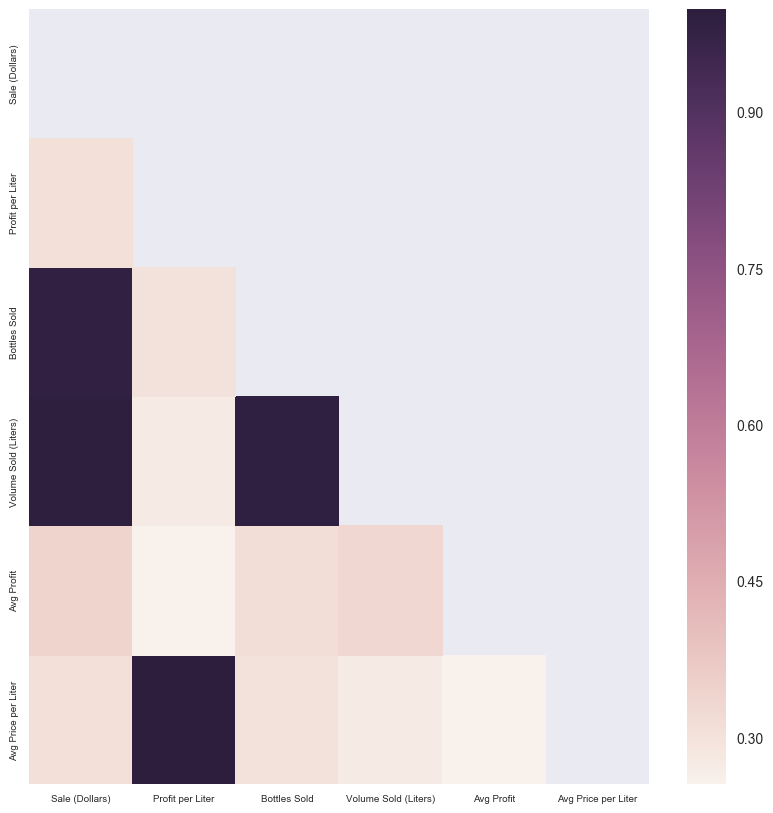

In [43]:
# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(10,10)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(liq_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(liq_data_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=7)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=7)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [44]:
liq_data.head()

Sale (Dollars)  Profit per Liter  Bottles Sold  \
City       Zip Code                                                   
DES MOINES 50312           92423.58         11.949699          5516   
           50314         1042415.69          9.082423         68426   
DAVENPORT  52084           38364.56          8.762636          4670   
SWISHER    52338           38446.84          8.686237          1571   
LECLAIRE   52753           53228.87          8.675417          3419   

                     Volume Sold (Liters)  Avg Profit  Avg Price per Liter  
City       Zip Code                                                         
DES MOINES 50312                  4109.89   40.461642            35.822580  
           50314                 59000.62   97.419112            27.225036  
DAVENPORT  52084                  1685.68   43.228345            26.274478  
SWISHER    52338                  1312.63  151.848719            26.027892  
LECLAIRE   52753                  2500.43  154.330819            25.983011

In [45]:
from sklearn.preprocessing import StandardScaler

cont_feats = ['Sale (Dollars)','Profit per Liter', 'Bottles Sold', 'Avg Profit', 'Avg Price per Liter']
liq_data[cont_feats] = StandardScaler().fit_transform(liq_data[cont_feats])

In [46]:
liq_data[:2]

Sale (Dollars)  Profit per Liter  Bottles Sold  \
City       Zip Code                                                   
DES MOINES 50312           0.163243          7.552742      0.027576   
           50314           6.789975          4.222181      6.110922   

                     Volume Sold (Liters)  Avg Profit  Avg Price per Liter  
City       Zip Code                                                         
DES MOINES 50312                  4109.89    0.182346             7.545928  
           50314                 59000.62    3.423842             4.221656

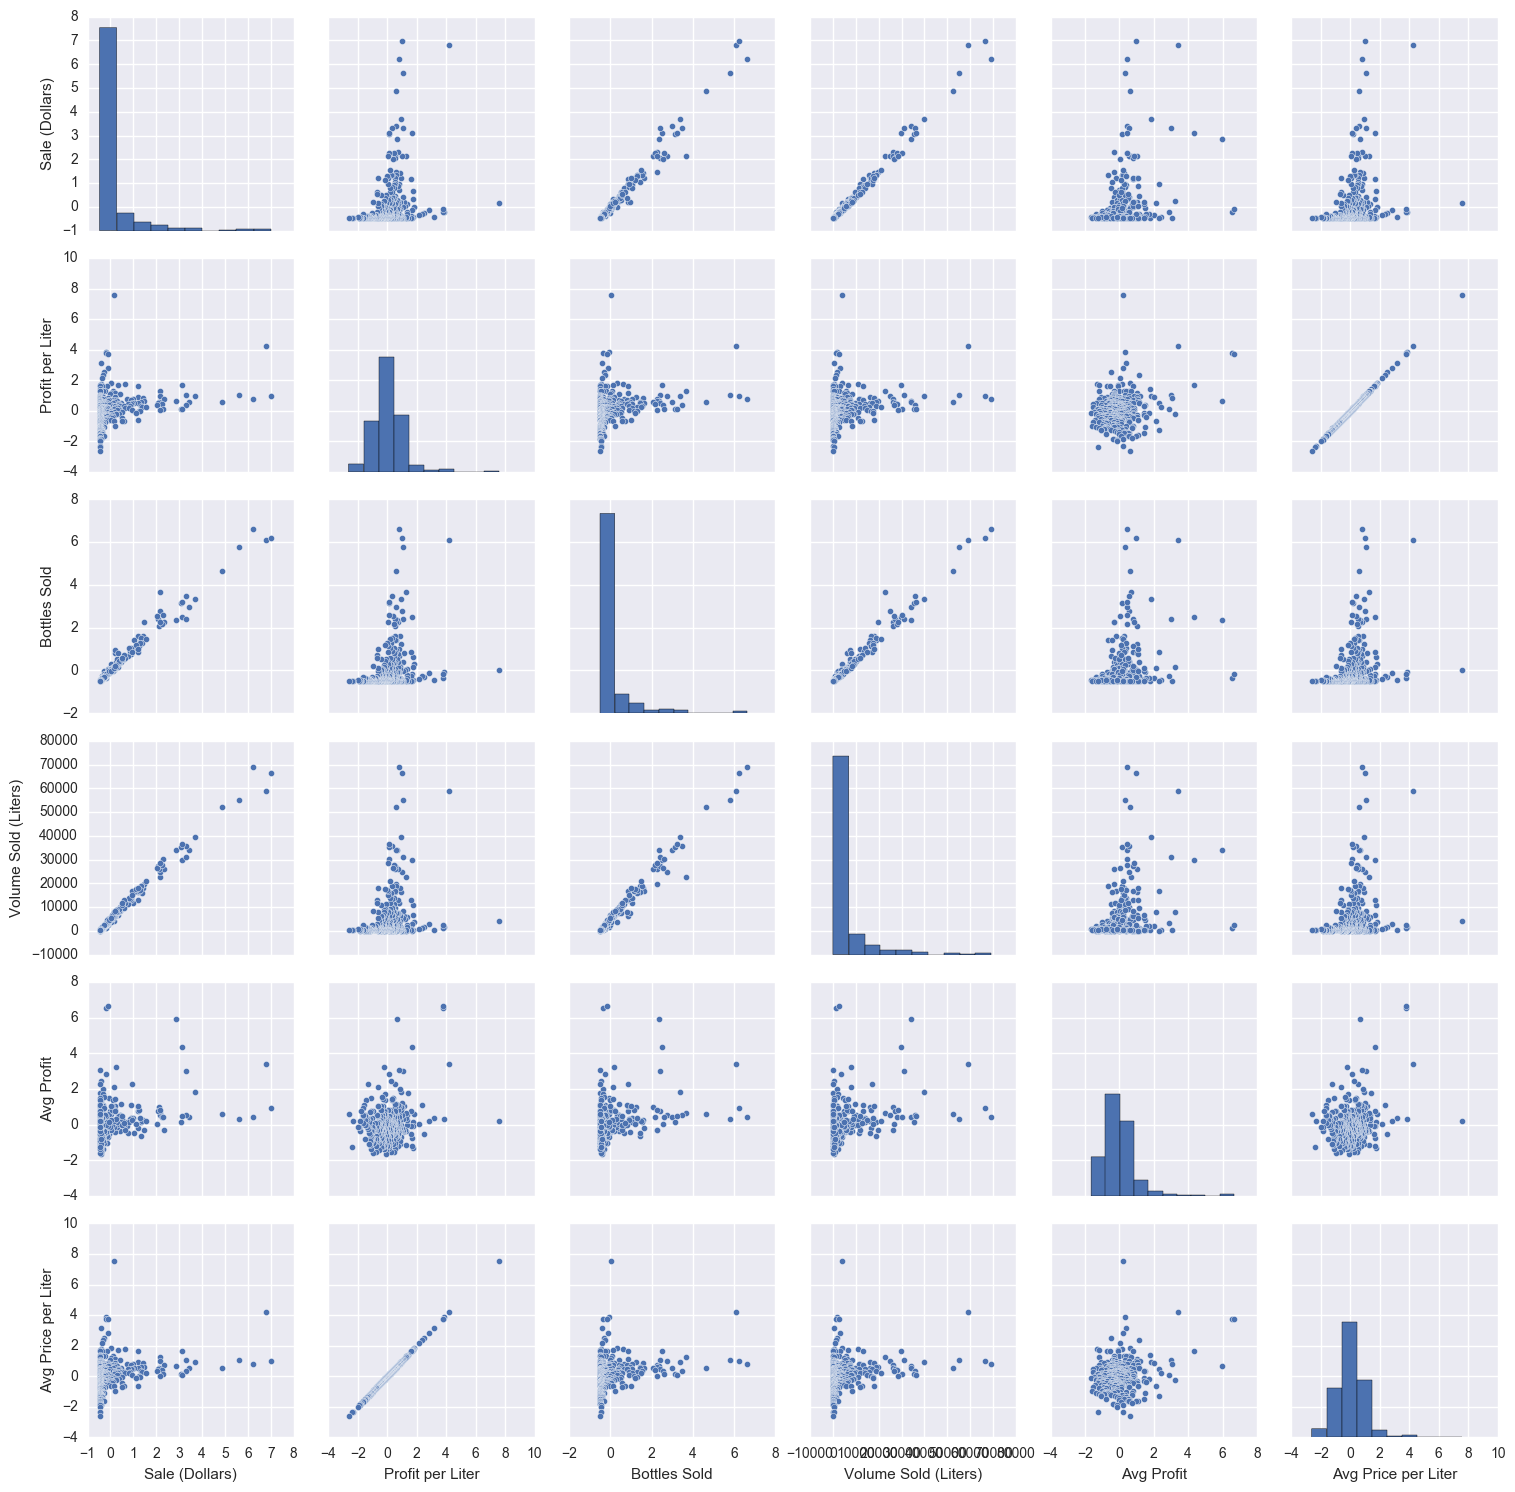

In [53]:
# sns.set(style="ticks")

# df = sns.load_dataset("iris")
# sns.pairplot(df, hue="species")

sns.pairplot(liq_data)


In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mt

X = liq_data[['Profit per Liter', 'Bottles Sold', 'Avg Profit']]
y = liq_data['Sale (Dollars)']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print "r2 score:", mt.r2_score(y, y_pred)

model.predict(np.array([41.6, -93.6, 1]).reshape(1, -1))

r2 score: 0.977794112767


array([-91.40319826])

In [55]:
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.preprocessing import StandardScaler

def load_data_and_split():
    liq_data_target = liq_data['Profit per Liter']
    X_train, X_test, y_train, y_test = train_test_split(liq_data, liq_data_target, random_state=42)
    return X_train, X_test, y_train, y_test

load_data_and_split()

X_train, X_test, y_train, y_test = load_data_and_split()

ridge_regressor = Lasso()

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ridge_regressor.fit(X_train, y_train)

def score_me(scorer, model, X, y):
    return scorer(model.predict(X), y)

print("MAE train {}".format(score_me(mean_absolute_error, ridge_regressor, X_train, y_train)))
print("MAE test  {}".format(score_me(mean_absolute_error, ridge_regressor, X_test,  y_test)))
print("MSE train {}".format(score_me(mean_squared_error, ridge_regressor, X_train, y_train)))
print("MSE test  {}".format(score_me(mean_squared_error, ridge_regressor, X_test,  y_test)))
print("R2  train {}".format(score_me(r2_score, ridge_regressor, X_train, y_train)))
print("R2  test  {}".format(score_me(r2_score, ridge_regressor, X_test,  y_test)))

MAE train 0.665133683311
MAE test  0.825139872873
MSE train 0.826136805923
MSE test  1.52002500551
R2  train -1.71581901684e+34
R2  test  -3.15696842441e+34


In [57]:
from sklearn.cross_validation import KFold
kf = KFold(len(liq_data), n_folds=10, shuffle=True, random_state=43)
kf

sklearn.cross_validation.KFold(n=397, n_folds=10, shuffle=True, random_state=43)

In [58]:
# Choose a target/dependent variable that we will predict
from sklearn.cross_validation import KFold
kfolds = KFold(liq_data.shape[0], n_folds=5)
# Choose a target/dependent variable that we will predict
target = 'Sale (Dollars)'

In [62]:
from sklearn.linear_model import ElasticNet

def ridge_lasso_cv_rsq(X, y, verbose=False):
    
    # lists to track mean R2s per alpha
    ridge_rsq = []
    lasso_rsq = []
    enet_rsq = []

    # initialize models
    lasso = Lasso()
    ridge = Ridge()
    enet = ElasticNet()

    print 'Lasso...'
    # iterate through Lasso alphas
    for la in l_alphas:
        
        if verbose: print la
        
        # set the current alpha to the model
        lasso.set_params(alpha=la)
        
        # keep track of fold R2s
        rsqs = []
        
        # iterate through the folds. Each iteration returns the training and
        # testing indices
        for traini, testi in kfolds:
            
            # run the current model with the subset training X and Y
            lasso.fit(X[traini], Y[traini])
            
            # append the R2 on the test set to the tracker
            rsqs.append(lasso.score(X[testi], Y[testi]))
            
        # append the mean of the R2s for this alpha to the R2 by alpha list
        lasso_rsq.append(np.mean(rsqs))

    print 'Ridge...'
    # Do the same process as above for ridge...
    for ra in r_alphas:
        
        if verbose: print ra
        
        ridge.set_params(alpha=ra)
        rsqs = []
        for traini, testi in kfolds:
            ridge.fit(X[traini], Y[traini])
            rsqs.append(ridge.score(X[testi], Y[testi]))
        ridge_rsq.append(np.mean(rsqs))
        
    print 'ElasticNet...'
    # Do the same process as above for ridge...
    for ea in e_alphas:
        
        if verbose: print ea
        
        enet.set_params(alpha=ea, l1_ratio=0.5)
        rsqs = []
        for traini, testi in kfolds:
            enet.fit(X[traini], Y[traini])
            rsqs.append(enet.score(X[testi], Y[testi]))
        enet_rsq.append(np.mean(rsqs))
        
    from sklearn.linear_model import LinearRegression
    
    linreg_rsq = []
    linreg = LinearRegression()
    for traini, testi in kfolds:
        linreg.fit(X[traini], Y[traini])
        linreg_rsq.append(linreg.score(X[testi], Y[[testi]]))
        
    linreg_rsq = np.mean(linreg_rsq)
        
    return ridge_rsq, lasso_rsq, enet_rsq, linreg_rsq
    
# Get the ridge and lasso cross-validated R2s:
ridge_rsq, lasso_rsq, enet_rsq, linreg_rsq = ridge_lasso_cv_rsq(X, y)

Lasso...


NameError: global name 'l_alphas' is not defined

In [65]:
# I don't know why this isn't working. I believe this is how you perform a simple OLS. Couldn't get my cross-validation to work either

import statsmodels.formula.api as smf
smf.ols('Sales (Dollars)', 'Avg Profit', 'Bottles Sold', df).summary()


AttributeError: 'str' object has no attribute 'ix'

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

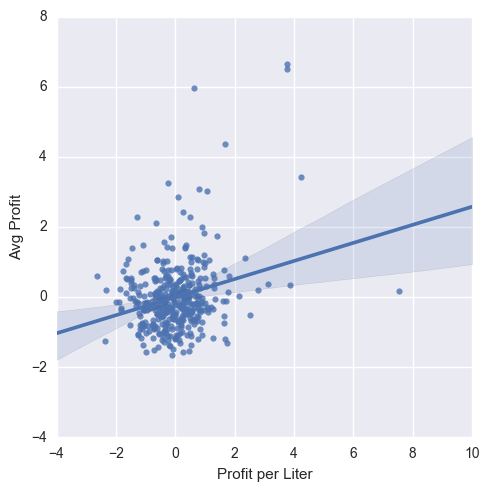

In [1300]:
import seaborn as sns
sns.lmplot(data=liq_data, y='Avg Profit', x='Profit per Liter')

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

### Conclusion:

My results were not very conclusive. My original linear regression model showed an r2 score of 0.977794112767. In general, the higher the R-squared, the better the model fits your data, 1.0, meaning the model completely fit the data. So, we had a very high r2 score. The more variance that is accounted for by the regression model, the closer the data points will fall to the fitted regression line. Theoretically, if a model could explain 100% of the variance, the fitted values would always equal the observed values and, therefore, all the data points would fall on the fitted regression line.

We often use a limited set of data to estimate the unknown parameters we do not know. If we overfit then our parameter estimates will work very well for the existing data, but not as well for when we use them in another context. Thus, cross-validation helps in avoiding overfitting by giving us some reassurance that the parameter estimates are not unique to the data we used to estimate them.

The bias-variance trade-off works like this: We want to find a point of least amount of error, in which the bias and variance are also at their lowest. However, when bias increases, it is normal for the variance to decrease. So, we want to find the lowest minimum balance where the error is at its lowest, and so are the variance and bias. This will give us the best-fitting linear model.

My MAE (Mean Absolute Error) and MSE (Mean Squared Error) underfit the test data quite a bit. We used the cross-validation technique to protect against over-fitting our model, especially, when our data is limited. We made a fixed number of folds (or partitions) of the data, ran the analysis on each fold, and then averaged the overall error estimate...which in our case, I don't think told us that much. 

I think our heat maps will give us the best indicator on where we could look for a location to open a liquor store in 2016. I would consider the "Profit per Liter" and "Profit" by Zip Code with the most weight. Although most of the tables looked very similar. Given this data, I would consider opening a store in one of the following cities or zip codes:

1. Des Moines
2. Davenport
3. Swisher
4. Le Claire
5. Dubuque
